# <center> **Bank Churners**

## **The dataset**:
This dataset contains a set of customer information collected from within a consumer credit card portfolio (The origin source : https://zenodo.org/record/4322342#.Y8OsBdJBwUE), it contains the following columns: 

- `CLIENTNUM` : Unique identifier for each customer. (Integer)
- `Attrition_Flag` : Flag indicating whether or not the customer has churned out. (Boolean)
- `Customer_Age` : Age of customer. (Integer)
- `Gender` : Gender of customer. (String)
- `Dependent_count` : Number of dependents that customer has. (Integer)
- `Education_Level` : Education level of customer. (String)
- `Marital_Status` : Marital status of customer. (String)
- `Income_Category` : Income category of customer. (String)
- `Card_Category` : Type of card held by customer. (String)
- `Months_on_book` : How long customer has been on the books. (Integer)
- `Total_Relationship_Count` : Total number of relationships customer has with the credit card provider. (Integer)
- `Months_Inactive_12_mon` : Number of months customer has been inactive in the last twelve months. (Integer)
- `Contacts_Count_12_mon` : Number of contacts customer has had in the last twelve months. (Integer)
- `Credit_Limit` : Credit limit of customer. (Integer)
- `Total_Revolving_Bal` : Total revolving balance of customer. (Integer)
- `Avg_Open_To_Buy` : Average open to buy ratio of customer. (Integer)
- `Total_Amt_Chng_Q4_Q1` : Total amount changed from quarter 4 to quarter 1. (Integer)
- `Total_Trans_Amt` : Total transaction amount. (Integer)
- `Total_Trans_Ct` : Total transaction count. (Integer)
- `Total_Ct_Chng_Q4_Q1` : Total count changed from quarter 4 to quarter 1. (Integer)
- `Avg_Utilization_Ratio` : Average utilization ratio of customer. (Integer)
- `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1` : Naive Bayes classifier for predicting whether or not someone will churn based on characteristics above.


## **Goal**:
The data provided can assist in examining the main drivers that affect the departure of customers by analyzing the customer’s spending behavior, marital status, education level, income category, gender and so on. Using this insights we can create a classifier that can predict the likelihood of a customer attrition.

## **Environment Setup**:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Get rid of FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Data Cleaning**

In [3]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


This dataset is provided with 2 columns by the name ``Naive_Bayes_Classifier_...``, it seems like the dataset provider have done some classification of his own using the Naive bayes classification. We will get rid of this two columns since our goal is to make a classification model of our own 🙂.

In [4]:
data = df.drop(df.iloc[:, -2:], axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
data.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Fortunatly, our dataset contains no missing data.

### Check for duplicated rows

In [7]:
data[data.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


Thus, the data contains no duplicated rows.

### Check for duplicated IDs

The column `CLIENTNUM` contains integer identifiers of customers. Each ID refers to one unique customer.

In [8]:
data.duplicated(subset=['CLIENTNUM']).unique()

array([False])

### Check for Unknowns 

In [9]:
data[data == 'Unknown'].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

It seems there are unknown values in:
- `Educational_Level`
- `Marital_Status`
- `Income_Category`


To avoid any confusion especialy in the encoding part of the above categorical columns, we propose the following solution :

In [10]:
data.Income_Category = data.Income_Category.replace({"Unknown": "Unknown_Income"})
data.Marital_Status = data.Marital_Status.replace({"Unknown": "Unknown_Mar_Status"})
data.Education_Level = data.Education_Level.replace({"Unknown": "Unknown_Edu_Level"})

### Chack for 0 values

In [11]:
data[data == 0].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count              904
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon        29
Contacts_Count_12_mon        399
Credit_Limit                   0
Total_Revolving_Bal         2470
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           5
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            7
Avg_Utilization_Ratio       2470
dtype: int64

In [12]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# **Exploratory Data Analysis**

## Target variable:  **`Attrition_Flag`**

The project intends to predict whether or not a customer will churn. We start by analyzing the target column `Attrition_Flag`.

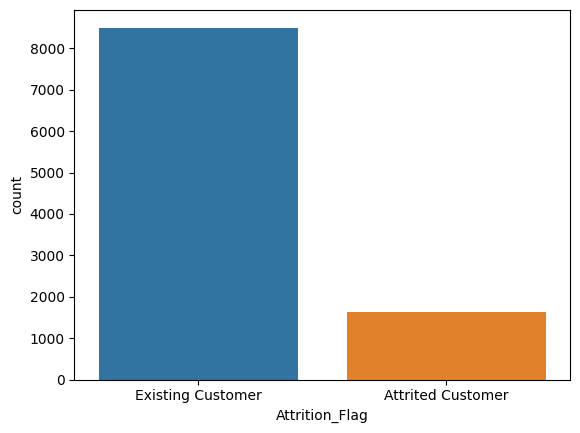

In [13]:
sns.countplot(x=data.Attrition_Flag)
plt.show()

In [14]:
# Data
labels = list(data.Attrition_Flag.unique())
sizes = list(data.Attrition_Flag.value_counts())

### Pie plot

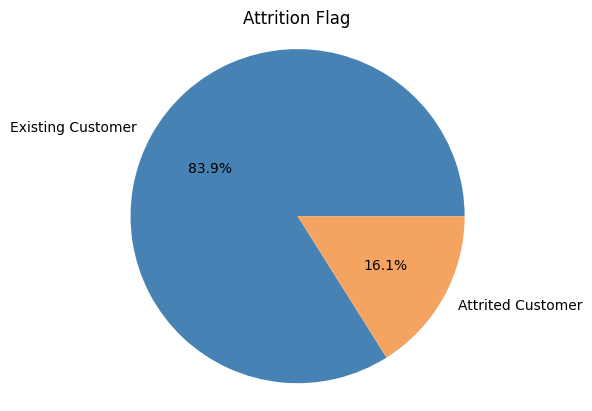

In [15]:
# Create plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["steelblue", "sandybrown"] )

# Customize plot
ax.axis('equal')  
plt.title('Attrition Flag')

# Show plot
plt.show()


## Variable:  **`Gender`**

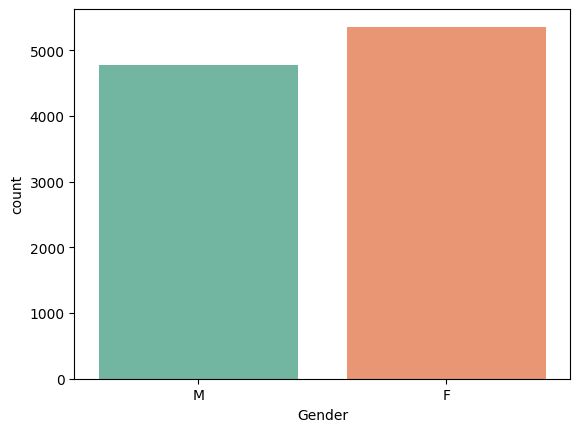

In [16]:
sns.countplot(x=data.Gender, palette = 'Set2')
plt.show()

### **Attrition rate by gender**

By now, we will analyze the rate of attrition for each gender.

In [17]:
cross_tab_prop = pd.crosstab(index=data['Gender'],
                        columns=data['Attrition_Flag'],
                             normalize="index")

cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop

Attrition_Flag,Gender,Attrited Customer,Existing Customer
0,F,0.173572,0.826428
1,M,0.146152,0.853848


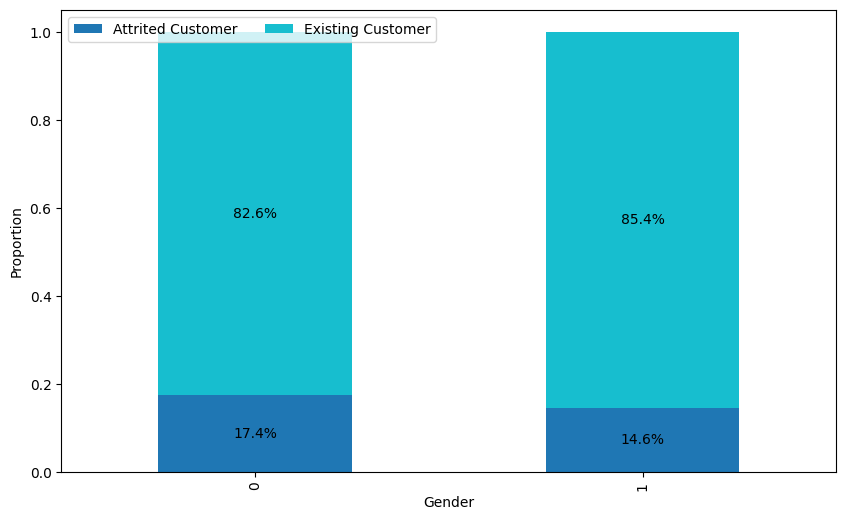

In [18]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## Variable:  **`Dependent_count`**

The integer column `Dependent_count` marks the number of dependents belonging to each customer.

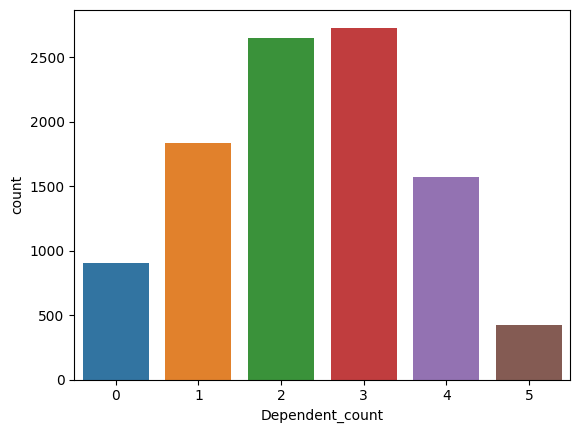

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


In [19]:
sns.countplot(x=data.Dependent_count)
plt.show()
print(data.Dependent_count.value_counts())

To display the rate of attrition for each count of dependant(s), we use the following code :

In [20]:
cross_tab_prop = pd.crosstab(index=data['Dependent_count'],
                        columns=data['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Dependent_count,,
0,0.149336,0.850664
1,0.146355,0.853645
2,0.157062,0.842938
3,0.176428,0.823572
4,0.165184,0.834816
5,0.150943,0.849057


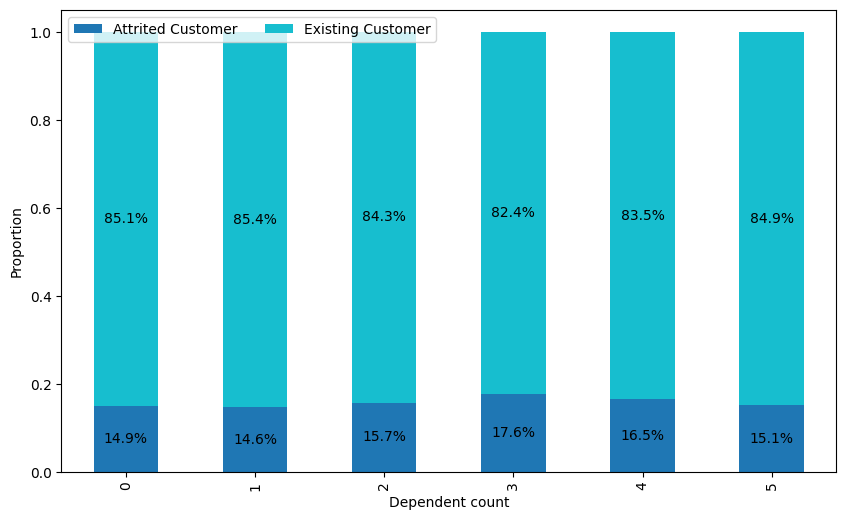

In [21]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Dependent count")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## Variable:  **`Marital_Status`**

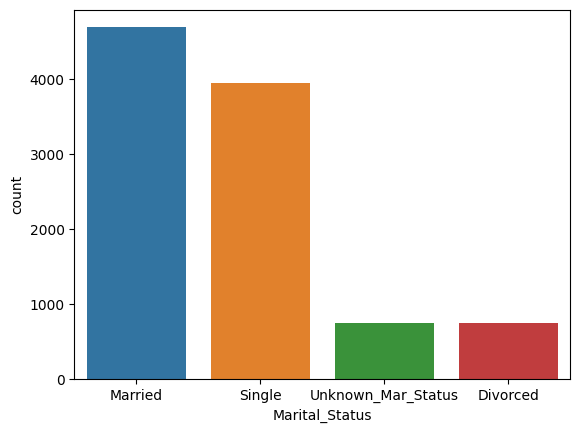

Married               4687
Single                3943
Unknown_Mar_Status     749
Divorced               748
Name: Marital_Status, dtype: int64


In [22]:
sns.countplot(x=data.Marital_Status)
plt.show()
print(data.Marital_Status.value_counts())

Likewise, we discover the rate of attrition for each status.

In [23]:
cross_tab_prop = pd.crosstab(index=data['Marital_Status'],
                        columns=data['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,0.161765,0.838235
Married,0.151269,0.848731
Single,0.169414,0.830586
Unknown_Mar_Status,0.172230,0.827770


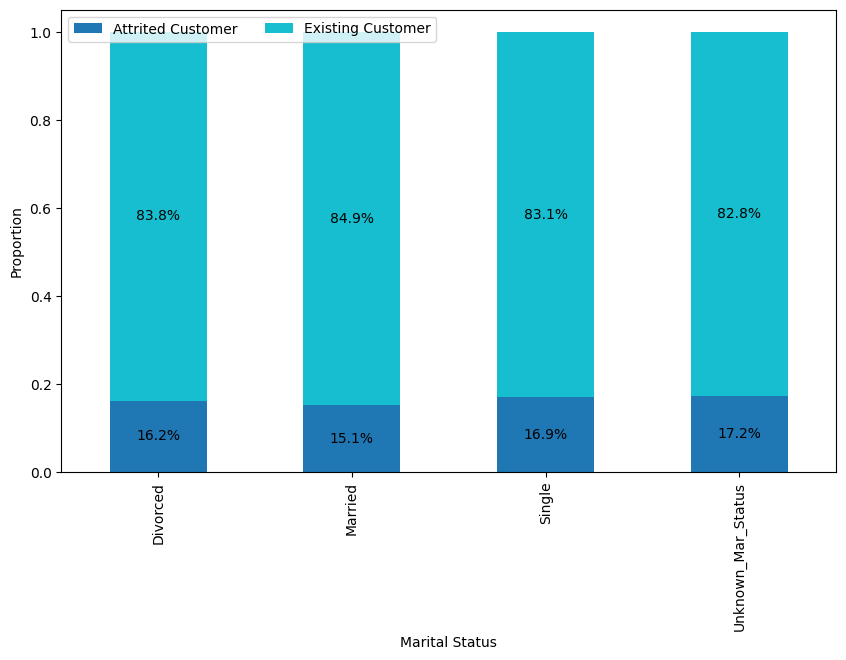

In [24]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Marital Status")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## Variable:  **`Income_Category`**

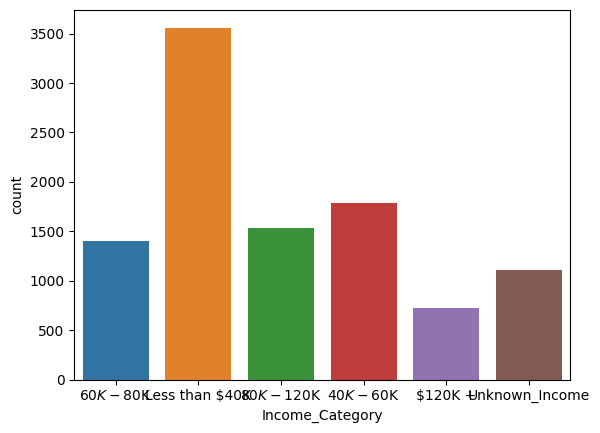

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown_Income    1112
$120K +            727
Name: Income_Category, dtype: int64


In [25]:
sns.countplot(x=data.Income_Category)
plt.show()
print(data.Income_Category.value_counts())

For every income category of customers, we compute the corresponding rate of churn as follows :

In [26]:
cross_tab_prop = pd.crosstab(index=data['Income_Category'],
                        columns=data['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown_Income,0.168165,0.831835


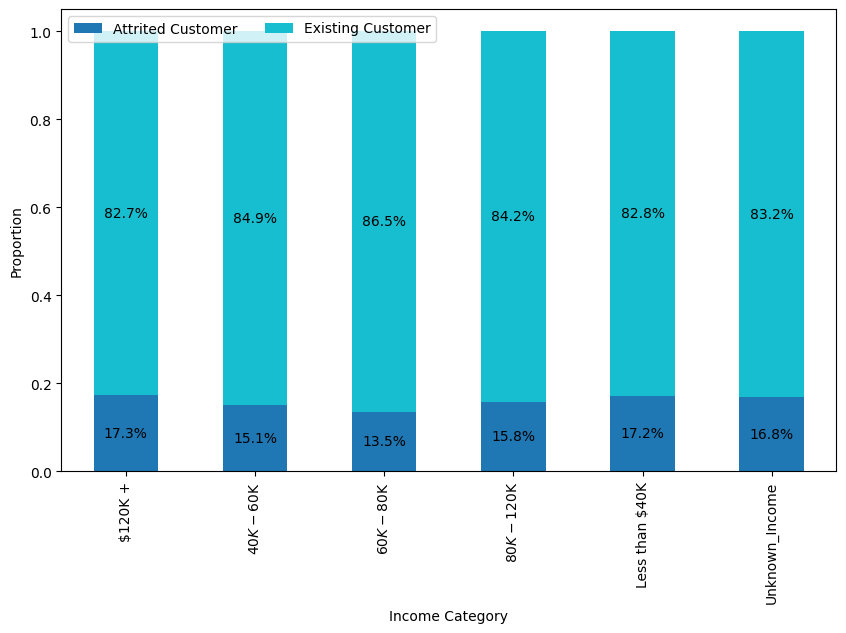

In [27]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## Variable:  **`Card_Category`**

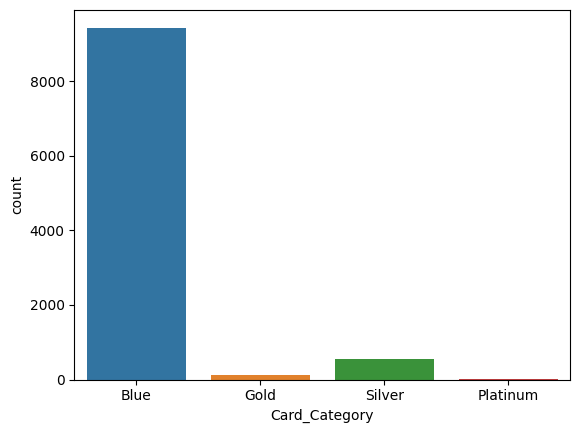

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [28]:
sns.countplot(x=data.Card_Category)
plt.show()
print(data.Card_Category.value_counts())

Similarly, we display the rate of attrition for every type of card held by customers.

In [29]:
cross_tab_prop = pd.crosstab(index=data['Card_Category'],
                        columns=data['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,0.160979,0.839021
Gold,0.181034,0.818966
Platinum,0.250000,0.750000
Silver,0.147748,0.852252


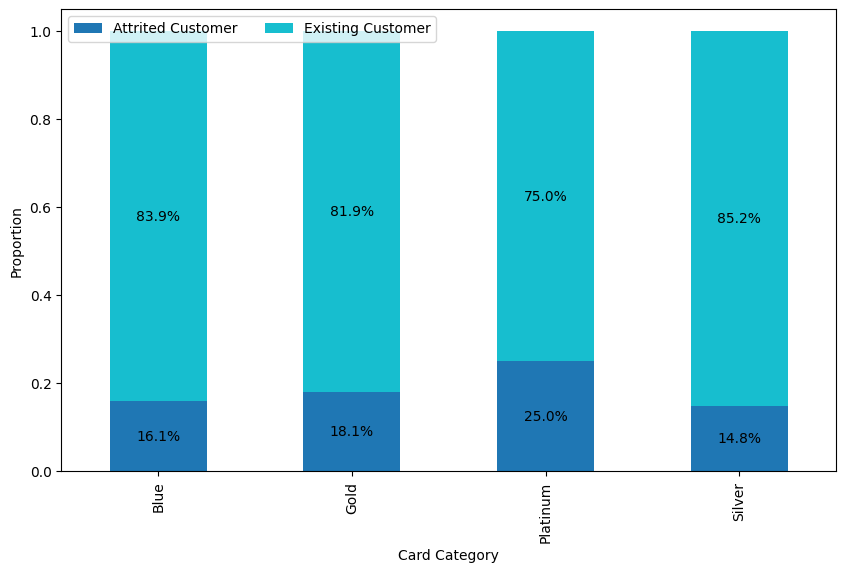

In [30]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Card Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## Variable:  **`Customer_Age`**

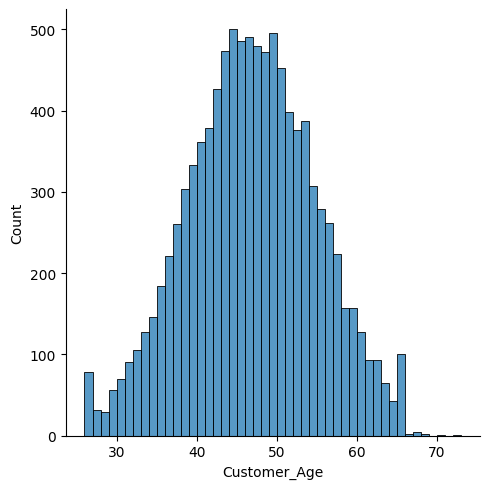

In [31]:
sns.displot(data.Customer_Age)
plt.show()

In [32]:
cross_tab_prop = pd.crosstab(index=data['Customer_Age'],
                        columns=data['Attrition_Flag'],
                             normalize="index")
cross_tab_prop.head()

Attrition_Flag,Attrited Customer,Existing Customer
Customer_Age,,
26,0.076923,0.923077
27,0.093750,0.906250
28,0.034483,0.965517
29,0.125000,0.875000
30,0.214286,0.785714


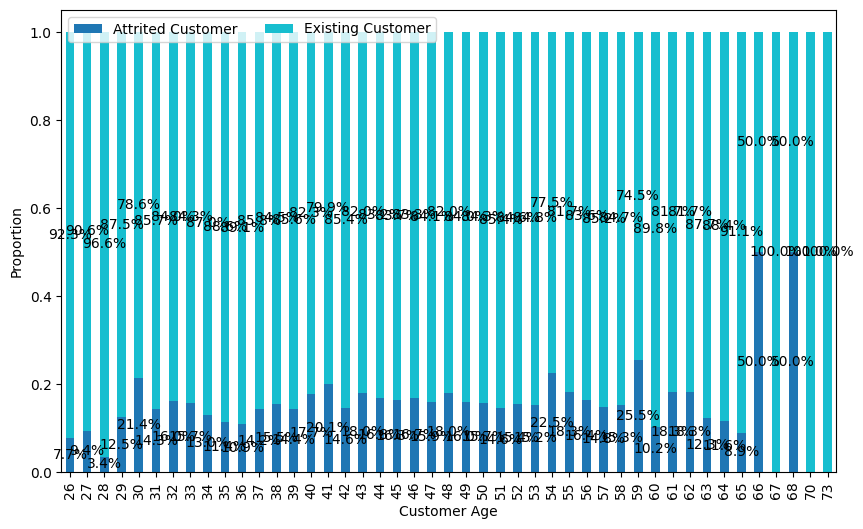

In [33]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Customer Age")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## Variable:  **`Education_Level`**

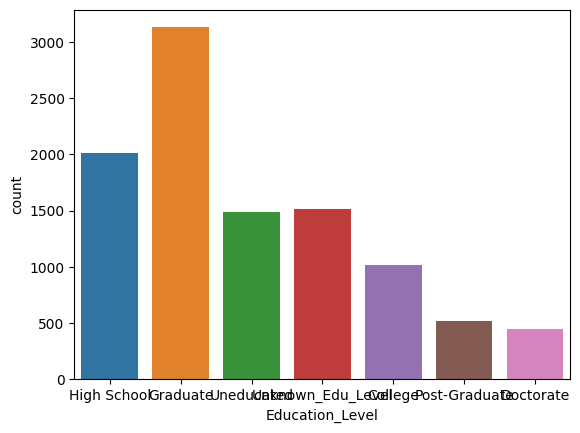

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [34]:
sns.countplot(x=data.Education_Level)
plt.show()
print(data.Card_Category.value_counts())

In [35]:
cross_tab_prop = pd.crosstab(index=data['Education_Level'],
                        columns=data['Attrition_Flag'],
                             normalize="index")
cross_tab_prop

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,0.152024,0.847976
Doctorate,0.210643,0.789357
Graduate,0.155691,0.844309
High School,0.152012,0.847988
Post-Graduate,0.178295,0.821705
Uneducated,0.159381,0.840619
Unknown_Edu_Level,0.168532,0.831468


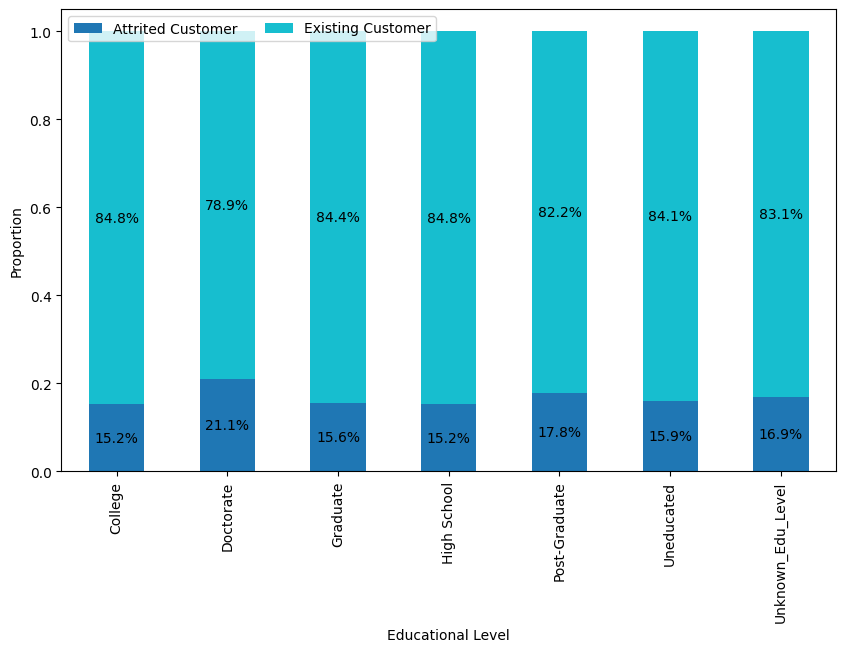

In [36]:
ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Educational Level")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

## **Visualization**

To get a rough sense of our data's distribution for each column, we construct a figure with multiple histograms. 

C:\Users\M.A\AppData\Local\Temp\ipykernel_25420\2271525477.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.iloc[:, 1:].hist(ax = ax)
C:\Users\M.A\AppData\Local\Temp\ipykernel_25420\2271525477.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


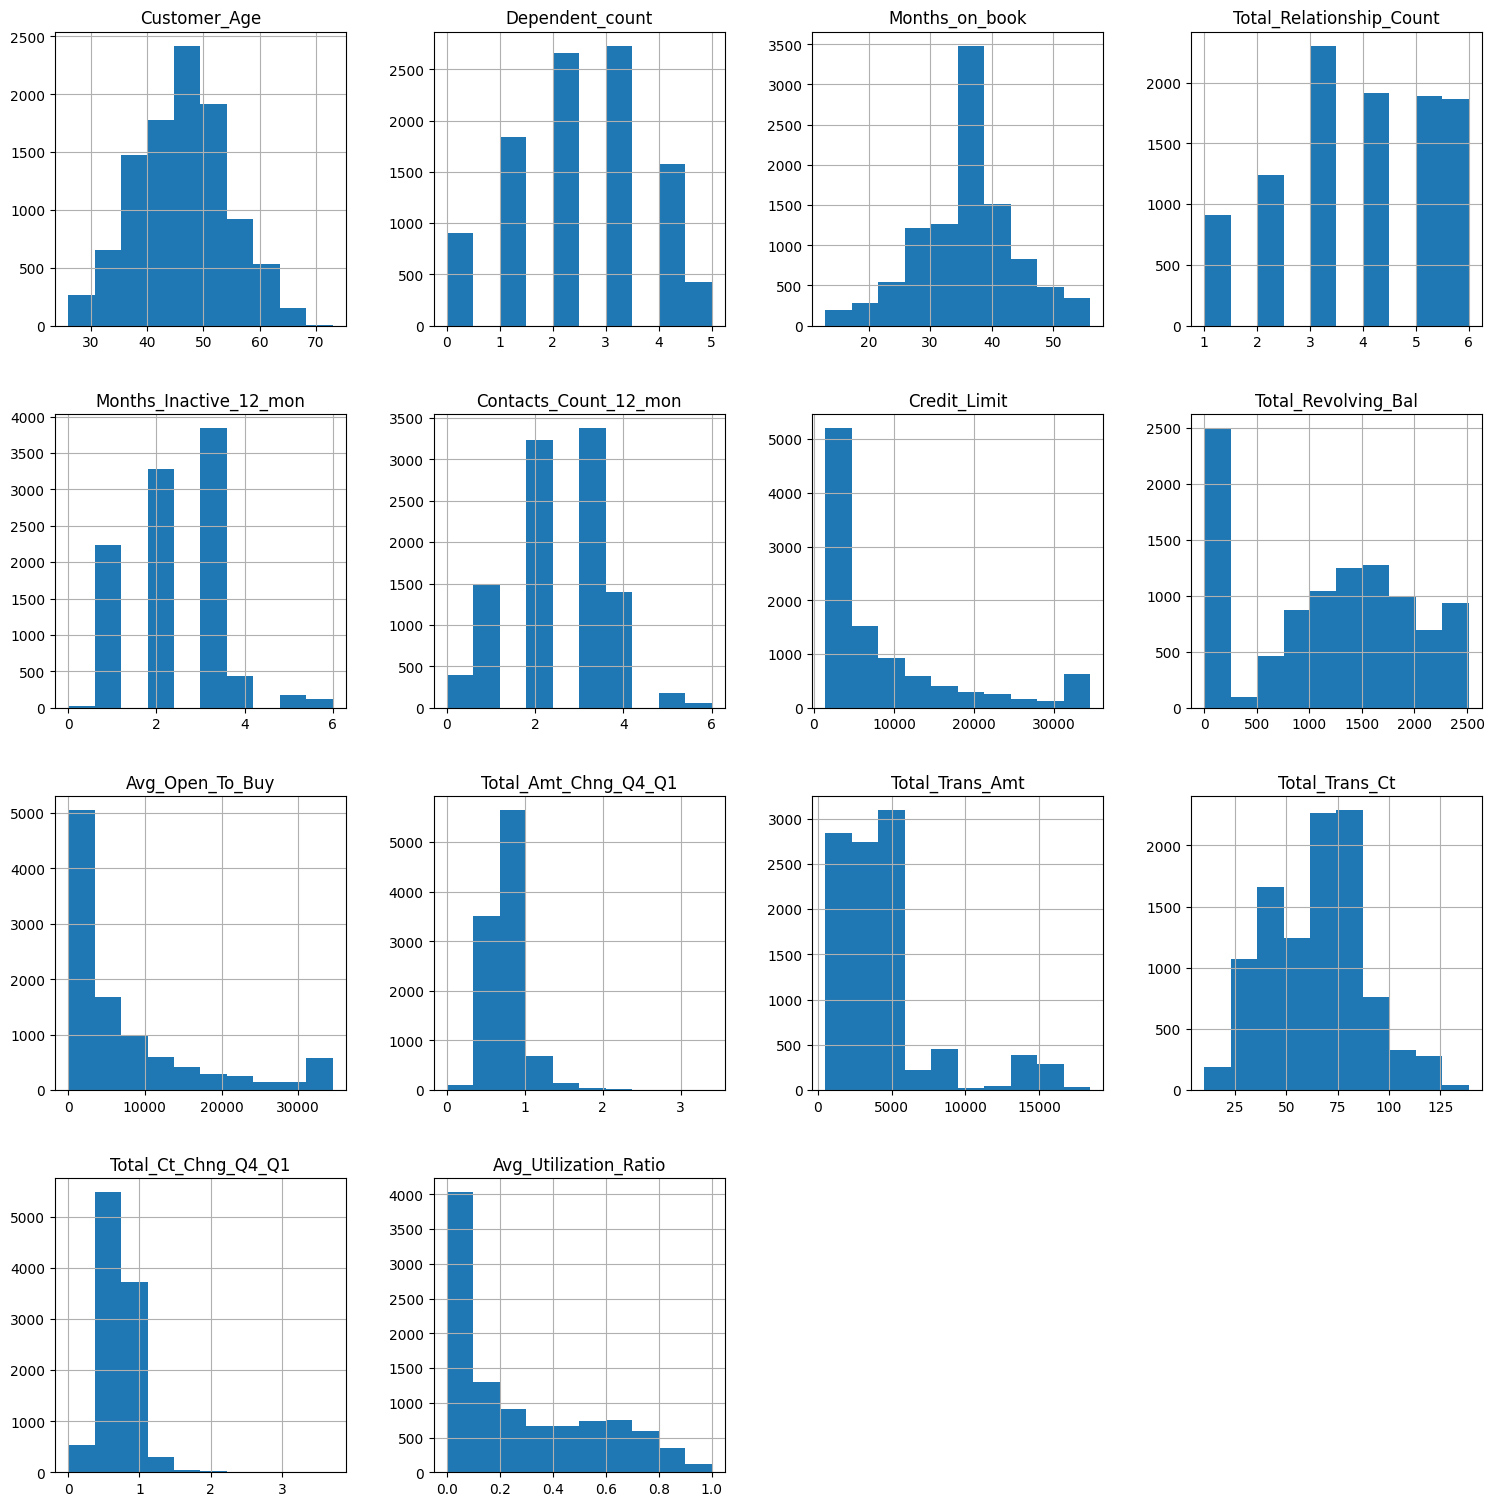

In [37]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
plt.tight_layout()
data.iloc[:, 1:].hist(ax = ax)
fig.show()

### Boxplots

#### Attrition by Credit_Limit Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

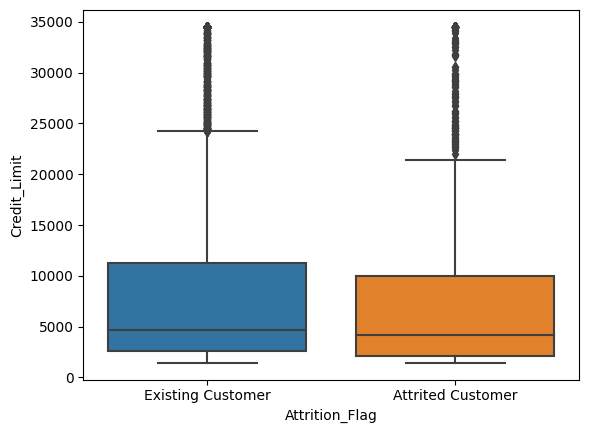

In [38]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=data)

#### Attrition by Total_Amt_Chng_Q4_Q1 Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

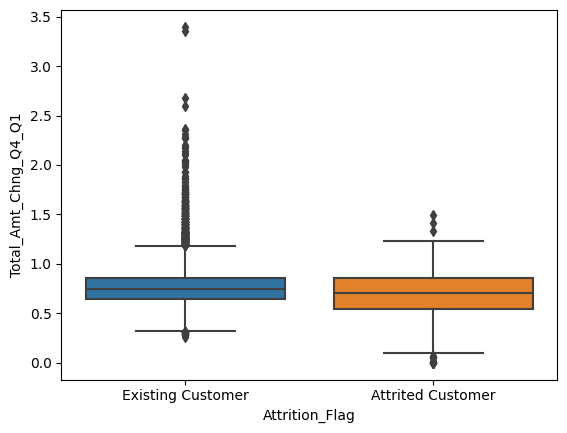

In [39]:
sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=data)

#### Attrition by Total_Relationship_Count Box Plot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

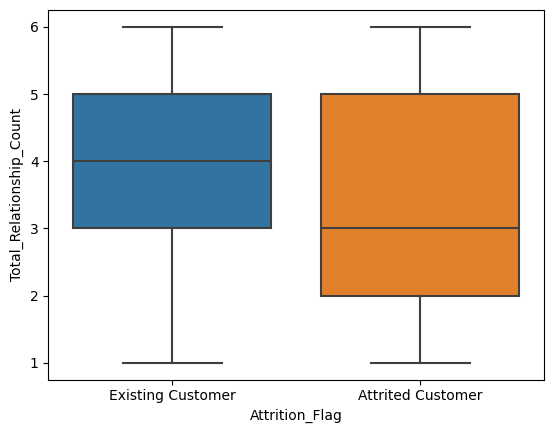

In [40]:
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=data)

#### Attrition by Avg_Utilization_Ratio Boxplot

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

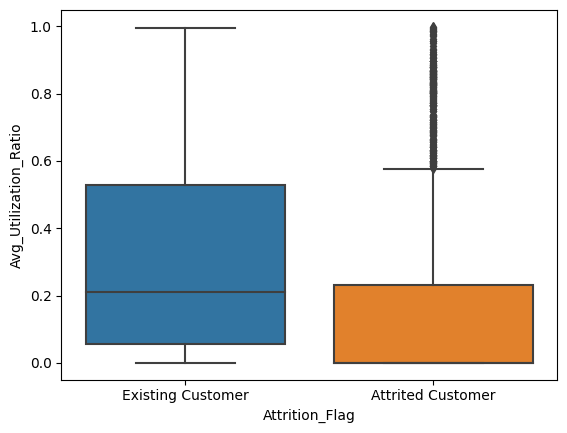

In [41]:
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df)

### Correlation matrix

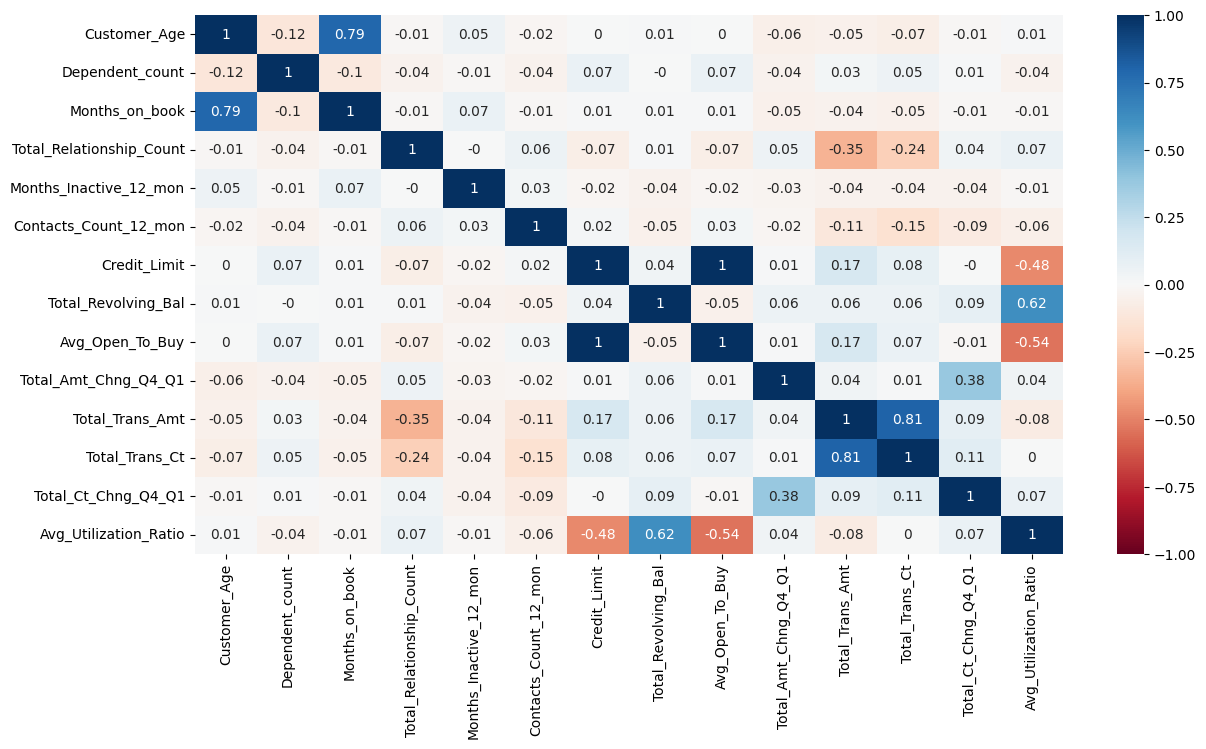

In [42]:
correlation = data.iloc[:, 1:].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()

**`Avg_Open_To_Buy`** is completely correlated with **`Credit_limit`**.

## **Data Reduction with Features selection**

Now, we encode the attrition flag column into a binary variable for model building.

In [43]:
Y = data.Attrition_Flag.map({'Attrited Customer': 1, 'Existing Customer': 0})
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

Besides, we drop the ID column since it is of no use for the sake of classification.

In [44]:
X = data.drop(["CLIENTNUM", "Attrition_Flag"] , axis=1)
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown_Mar_Status,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### One-Hot Encoder

At this point, we transform our categorical variables into dummy ones (*one-hot encoding*) to serve as input data for our model.

In [45]:
Ed_level = pd.get_dummies(data.Education_Level)
Mt_Status = pd.get_dummies(data.Marital_Status)
Cd_Category = pd.get_dummies(data.Card_Category)
In_Category = pd.get_dummies(data.Income_Category)
Gender = pd.get_dummies(data.Gender)

X = pd.concat([X, Ed_level, Mt_Status, Cd_Category, In_Category, Gender], axis=1)

X.drop(columns=["Education_Level", "Marital_Status", "Card_Category", "Income_Category", "Gender"], axis=1, inplace=True)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Platinum,Silver,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown_Income,F,M
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,0,0,1,0,0,0,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,0,0,1,0,1,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,0,1,0,0,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,0,0,1,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,0,0,1,0,0,0,0,1


It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model. Hence, we reduce the number of input variables by selecting the top features having the strongest relationship with the target variable.

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply CFS to select the top 2 features
selector = SelectKBest(f_classif, k=28)
X_new = selector.fit_transform(X, Y)

In [47]:
mask = selector.get_support()

# Use the mask to select only the selected features from the original dataset
selected_feature_names = X.columns[mask]
Selected_Columns = X[selected_feature_names]


# Show the selected features
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Doctorate', 'Graduate',
       'High School', 'Post-Graduate', 'Unknown_Edu_Level', 'Married',
       'Single', 'Unknown_Mar_Status', 'Platinum', '$120K +', '$40K - $60K',
       '$60K - $80K', 'Less than $40K', 'F', 'M'],
      dtype='object')


In [48]:
Selected_Columns

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Married,Single,Unknown_Mar_Status,Platinum,$120K +,$40K - $60K,$60K - $80K,Less than $40K,F,M
0,45,3,39,5,1,3,12691.0,777,1.335,1144,...,1,0,0,0,0,0,1,0,0,1
1,49,5,44,6,1,2,8256.0,864,1.541,1291,...,0,1,0,0,0,0,0,1,1,0
2,51,3,36,4,1,0,3418.0,0,2.594,1887,...,1,0,0,0,0,0,0,0,0,1
3,40,4,34,3,4,1,3313.0,2517,1.405,1171,...,0,0,1,0,0,0,0,1,1,0
4,40,3,21,5,1,0,4716.0,0,2.175,816,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,0.703,15476,...,0,1,0,0,0,1,0,0,0,1
10123,41,2,25,4,2,3,4277.0,2186,0.804,8764,...,0,0,0,0,0,1,0,0,0,1
10124,44,1,36,5,3,4,5409.0,0,0.819,10291,...,1,0,0,0,0,0,0,1,1,0
10125,30,2,36,4,3,3,5281.0,0,0.535,8395,...,0,0,1,0,0,1,0,0,0,1


## **PCA**

To extract a set of features from the list of the previously selected features, we use the principal component analysis technique :  

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the selected features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [50]:
variance_totale = []

for i in range(37):
    pca = PCA(i)
    reduced_data = pca.fit_transform(data_scaled)
    print("\nShape : {}".format(reduced_data.shape))
    s = "{:.2f}%  "*(i)
    print("Pourcentages de variance expliquée :"+s.format(*pca.explained_variance_ratio_*100))
    variance = pca.explained_variance_ratio_.sum()*100
    variance_totale.append(variance)
    print("Variance totale expliquée : {:.2f}%".format(variance))

plt.figure(figsize=(17,8))
plt.plot(variance_totale)
plt.scatter(np.arange(37), variance_totale, color='red')
#plt.axhline(90, linestyle='--')
plt.title("Variance totale expliquée en fonction de n_components")
plt.show()


Shape : (10127, 0)
Pourcentages de variance expliquée :
Variance totale expliquée : 0.00%

Shape : (10127, 1)
Pourcentages de variance expliquée :11.85%  
Variance totale expliquée : 11.85%

Shape : (10127, 2)
Pourcentages de variance expliquée :11.85%  6.89%  
Variance totale expliquée : 18.74%

Shape : (10127, 3)
Pourcentages de variance expliquée :11.85%  6.89%  5.26%  
Variance totale expliquée : 24.00%

Shape : (10127, 4)
Pourcentages de variance expliquée :11.85%  6.89%  5.24%  4.83%  
Variance totale expliquée : 28.81%

Shape : (10127, 5)
Pourcentages de variance expliquée :11.85%  6.89%  5.25%  4.83%  4.69%  
Variance totale expliquée : 33.52%

Shape : (10127, 6)
Pourcentages de variance expliquée :11.85%  6.89%  5.26%  4.84%  4.70%  4.06%  
Variance totale expliquée : 37.60%

Shape : (10127, 7)
Pourcentages de variance expliquée :11.85%  6.89%  5.26%  4.82%  4.68%  4.04%  3.73%  
Variance totale expliquée : 41.27%

Shape : (10127, 8)
Pourcentages de variance expliquée :11.85%

The best $n$ Component would be 28 since it explains about 97.80% of the variance.

In [ ]:
reduced_data

array([[ 1.49917875e+00, -2.38180932e+00, -1.20618827e+00, ...,
        -1.34364337e-14, -2.58343204e-15,  8.50806101e-15],
       [-1.36351584e+00,  6.52538350e-01, -1.51913372e+00, ...,
        -4.96005221e-15, -5.11573090e-15,  2.04234613e-14],
       [ 9.43141422e-01, -2.25173303e+00, -2.37522652e+00, ...,
        -3.47756067e-15, -5.68367173e-15,  3.27630040e-15],
       ...,
       [-1.21220460e+00,  6.67831186e-01,  6.51363229e-01, ...,
        -2.62858305e-16,  1.24941206e-16, -1.11982803e-16],
       [ 7.87088153e-01, -3.95010831e-01, -1.26406394e+00, ...,
        -7.44703883e-17,  1.59603988e-16, -8.72880667e-17],
       [ 8.89868199e-01,  3.58345996e+00,  9.55809724e-01, ...,
         4.43557164e-17, -1.30312037e-17,  5.70171628e-16]])

## **Classification**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

To develop a model for churn classification, we use supervised machine learning algorithms to predict the likelihood of attrition based on the experience learned from the training data. For our purpose, we will choose 3 algorithms, namely Decision Tree, Random Forest, and $K$-Neighbors. There are several reasons why these classifiers may be a good choice for a classification problem like customer churn prediction :

- *Interpretability* : easy to understand and interpret, as they can be visualized and the rules learned from the data can be easily explained to non-technical stakeholders. This can be particularly important in situations where it's necessary to gain insights into the factors that are driving customer churn.

- *Handling non-linear relationships* : capable of capturing non-linear relationships between the input features and the target variable, which may be important in a complex problem like customer churn prediction.
 
- *Robustness to noise* : can handle noisy data by ignoring irrelevant features and focusing on the most important ones. This can help improve the accuracy of the model in situations where the data is noisy or incomplete.

- *Scalability* : can handle large datasets with many features and can be easily parallelized, making them a good choice for problems with a large amount of data.
  
- *Ensemble methods* : can be combined with other algorithms to create powerful ensemble methods like Random Forests or Gradient Boosting, which can improve the performance of the model and reduce overfitting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_predtrain_dt = cross_val_predict(estimator = dt, X = X_train, y = y_train, cv = 10)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predtrain_rf = cross_val_predict(estimator = rf, X = X_train, y = y_train, cv = 10)
y_pred_rf = rf.predict(X_test)

# KNN
KNN = KNeighborsClassifier(2)
KNN.fit(X_train, y_train)
y_predtrain_KNN = cross_val_predict(estimator = KNN, X = X_train, y = y_train, cv = 10)
y_pred_KNN = KNN.predict(X_test)

### **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Decision Tree Classifier

Accuracy Score (Decision Tree): 0.9374794340243501
Validation Report (Decision Tree):
                precision    recall  f1-score   support

           0       0.96      0.96      0.96      5917
           1       0.79      0.79      0.79      1171

    accuracy                           0.93      7088
   macro avg       0.87      0.87      0.87      7088
weighted avg       0.93      0.93      0.93      7088

Evaluation Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2583
           1       0.79      0.79      0.79       456

    accuracy                           0.94      3039
   macro avg       0.88      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039

Confusion Matrix (Decision Tree):



Text(0.5, 15.0, 'Prediction')

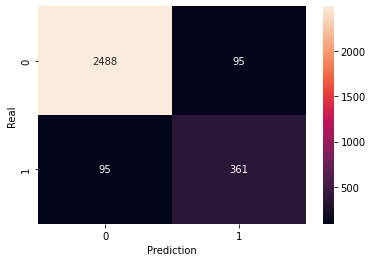

In [ ]:
print('Accuracy Score (Decision Tree):', accuracy_score(y_test, y_pred_dt))
print('Validation Report (Decision Tree):\n ', classification_report(y_train, y_predtrain_dt))
print('Evaluation Report (Decision Tree):\n', classification_report(y_test, y_pred_dt))
print('Confusion Matrix (Decision Tree):\n')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')

The model has an accuracy score of 0.937 and a precision of 0.79 for class 1, which means that out of all the predicted customers who will churn, 79% of them will actually churn. The recall score for class 1 is also 0.79, which means that out of all the actual customers who will churn, the model will correctly identify 79% of them. The f1-score for class 1 is 0.79, which is the harmonic mean of precision and recall.

Overall, the model has a high accuracy score, but its precision and recall scores for class 1 are not as high as we would like them to be. This means that the model may incorrectly predict some customers as churning or miss some customers who will churn. We may need to further evaluate the model to see if we can improve its performance.

#### Random Forest Classifier


Accuracy Score (Random Forest): 0.9503126028298783
Validation Report (Random Forest):
                precision    recall  f1-score   support

           0       0.96      0.99      0.97      5917
           1       0.93      0.79      0.85      1171

    accuracy                           0.96      7088
   macro avg       0.94      0.89      0.91      7088
weighted avg       0.95      0.96      0.95      7088

Evaluation Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2583
           1       0.90      0.75      0.82       456

    accuracy                           0.95      3039
   macro avg       0.93      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039

Confusion Matrix (Random Forest):



Text(0.5, 15.0, 'Prediction')

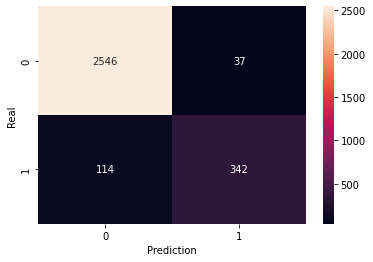

In [ ]:
print('\nAccuracy Score (Random Forest):', accuracy_score(y_test, y_pred_rf))
print('Validation Report (Random Forest):\n ', classification_report(y_train, y_predtrain_rf))
print('Evaluation Report (Random Forest):\n', classification_report(y_test, y_pred_rf))
print('Confusion Matrix (Random Forest):\n')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')

The Random Forest model has a higher accuracy score of 0.95 compared to the Decision Tree model. The precision for class 1 is also higher at 0.93, which means that out of all the predicted customers who will churn, 93% of them will actually churn. However, the recall score for class 1 is 0.79, which means that out of all the actual customers who will churn, the model will correctly identify only 79% of them. The f1-score for class 1 is 0.85, which is higher than the Decision Tree model.

Overall, the Random Forest model has a higher accuracy score and precision for class 1 than the Decision Tree model, but its recall score for class 1 is not as high as we would like it to be. We may need to further evaluate the model to see if we can improve its performance.

#### $K$-Nearest Neighbors


Accuracy Score (KNN): 0.8871339256334321
Validation Report (KNN):
                precision    recall  f1-score   support

           0       0.89      0.97      0.93      5917
           1       0.74      0.41      0.53      1171

    accuracy                           0.88      7088
   macro avg       0.82      0.69      0.73      7088
weighted avg       0.87      0.88      0.86      7088

Evaluation Report (KNN):
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2583
           1       0.71      0.41      0.52       456

    accuracy                           0.89      3039
   macro avg       0.81      0.69      0.73      3039
weighted avg       0.88      0.89      0.87      3039

Confusion Matrix (KNN):



Text(0.5, 15.0, 'Prediction')

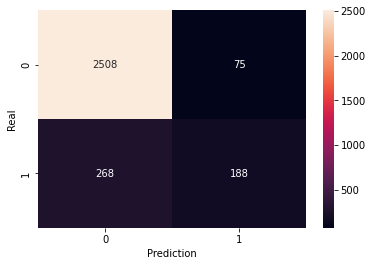

In [ ]:
print('\nAccuracy Score (KNN):', accuracy_score(y_test, y_pred_KNN))
print('Validation Report (KNN):\n ', classification_report(y_train, y_predtrain_KNN))
print('Evaluation Report (KNN):\n', classification_report(y_test, y_pred_KNN))
print('Confusion Matrix (KNN):\n')
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction')

The KNN model has a lower accuracy score of 0.887 compared to the other two models. The precision for class 1 is also lower at 0.74, which means that out of all the predicted customers who will churn, only 74% of them will actually churn. The recall score for class 1 is 0.41, which means that out of all the actual customers who will churn, the model will correctly identify only 41% of them. The f1-score for class 1 is 0.53, which is the lowest among the three models.

Overall, the KNN model has a lower accuracy score, lower precision and recall scores for class 1 than the other two models. This suggests that the KNN model may not be the best choice for this particular classification problem.

## **Conclusion**

Based on these validation reports, the Random Forest model seems to be the best model as it has the highest accuracy score and precision for class 1, *i.e.* Attrited Customer Class. However, we may need to evaluate the model further to see if we can improve its recall score for class 1.

### **Save Random Forest model**

In [ ]:
from joblib import dump, load
dump(rf, "ML_model.joblib")

NameError: name 'rf' is not defined